# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

## Содержание методического пособия:


<ol>
<li>Что такое Сверточные нейронные сети</li>
<li>Архитектура Сверточных нейронных сетей</li>
<li>Несколько практических примеров сверточных нейронных сетей на Keras</li>
</ol>

## Что такое Сверточные нейронные сети

**Сверточные нейронные сети** - это самый природо-подобный алгоритм из всех. Современные сверточные нейронные сети базируется на нейронной сети AlexNet, она базируется на сверточных нейронных сетях, которые разрабатывал Ян Лекун в 90 гг, все они базируются на открытиях в области зрительной коры головного мозга. Особенности сверточных нейронных сетей, о которых речь пойдет далее призваны помочь строить глубокие нейронные сети, имеющими меньшие вычислительные затраты, чем полносвязные. Пока давайте взглянем на области применения данного вида нейронных сетей:

- Задачи классификации

- Задачи локализации, детекции

- Задачи сегментации

<img src='https://drive.google.com/uc?export=view&id=1fr3ZImV8az9PV4sZ_qaucba2oxCpDgXQ'>

- Распознавание лиц

- Визуальный поиск

<img src='https://drive.google.com/uc?export=view&id=1DlXcIvD8LfepFQ5ax3xt9O9BcxpNx980'>


- Помощь врачам в анализе медицинских снимков

- Оценка цифр написанных от руки банками. Одно из самых ранних применений сверточных нейронных сетей.

Однако применение сверточных нейронных сетей не ограничивается областью компьютерного зрения. Они также применяются и в других областях:

- Анализ текстов. Для этого больше подходят рекуррентные нейронные сети, но когда речь заходит о детекции определенных признаков в тексте например бранной речи, лучше могут подойти сверточные нейронные сети


## Глубокое обучение

**Глубокое обучение** - это обучение глубоких нейронных сетей. Глубокие нейронные сети - это сети с больше чем одним внутренним слоем.

Однако, прежде чем мы начнем разбирать глубокое обучение давайте в кратце опишем сверточные нейронные сети. Главная отличительная черта сверточных нейронных сетей - это наличие *сверточных слоев* и *пуллинг слоев*. Подобные слои как раз и были обнаружены в зрительной коре головного мозга. В искусственной нейронной сети сверточный слой состоит из фрагментов, которые связаны только с определенной частью изображения, что позволяет не связывать каждый нейрон с каждым пикселем и уменьшить вычислительные затраты. Конечная цель сверточного слоя - получить определенные признаки от изображения и передать их в следующий слой, точно также, как и случае с обычной полнозсвязной нейронной сетью. Но сверточный слой это делает более эффективно.

Сверточная нейронная сеть строиться по принципу пирамиды - первые слои содержат больше нейронов, а последующие все меньше и меньше. Связано это с тем что низкоабстрактных признаков больше, чем высокоабстрактных.

Как правило, на конце нейронной сети располагаются несколько полносвязных слоев. Эти слои как раз уже учатся на высокоабстрактных признаках, которых немного и соотвественно не требуется много слоев и соответственно с точки зрения вычислительных затрат они приемлимы. Т.е. получается сверточную нейронную сеть можно условно поделить на две части - одна извлекает признаки, а другая, полносвязная, обучается на этих признаках.

<img src='https://drive.google.com/uc?Export=view&id=1fyvqBPZtdYRUi0uV6vo-z4eezhlGtq0G'>

Допустим, мы будем работать с изображениями животных. Первые слои выучат признаки животных низкого уровня абстракции, такие как линии под определенными углами, следующие слои на базе этих признаков выучат более сложные признаки, например геометрические фигуры на базе сочетания этих линий. Следующие слои выучат такие признаки как глаза, уши и т.д. которые будут составлены из этих геометрических фигур. Подобные высокоасбтрактные признаки, как названнные выше, уже можно использовать для того, чтобы сделать заключение, какое животное на картинке.





## Свертка

<img src='https://drive.google.com/uc?export=view&id=1Ef5pgocGDTCfee0bHk4uO4tktHYNVgLX'>



In [ ]:
import cv2
import numpy as np
from scipy import misc
img = misc.ascent()

In [ ]:
img.shape

(512, 512)

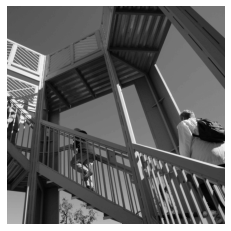

In [ ]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

Фильтры выделяют что-то особенное на картинке.

**Усредняющий фильтр**

In [ ]:
# зададим вес для свертки
weight  = 1

In [ ]:
filter_ = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
print(np.array(filter_).shape)
filter_

(3, 3)


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

**Свертка**

In [ ]:
def apply_filter(img, filter_):
    for x in range(1, size_x - 1):
        for y in range(1, size_y - 1):
            convolution = 0.0
            convolution = convolution + (img[x - 1, y-1] * filter_[0][0])
            convolution = convolution + (img[x, y-1] * filter_[0][1])
            convolution = convolution + (img[x + 1, y-1] * filter_[0][2])
            convolution = convolution + (img[x-1, y] * filter_[1][0])
            convolution = convolution + (img[x, y] * filter_[1][1])
            convolution = convolution + (img[x+1, y] * filter_[1][2])
            convolution = convolution + (img[x-1, y+1] * filter_[2][0])
            convolution = convolution + (img[x, y+1] * filter_[2][1])
            convolution = convolution + (img[x+1, y+1] * filter_[2][2])
            convolution = convolution * weight
            if convolution < 0:
                convolution = 0
            if convolution > 255:
                convolution = 255
            img_transformed[x, y] = convolution
            
    return img_transformed

In [ ]:
def apply_filter(img, filter_):
    for x in range(1, size_x-1):
        for y in range(1, size_y-1):
            convolution = 0.0

            dimg = img[x-1:x+2, y-1:y+2] 
            convolution = np.sum(dimg * filter_)

            convolution = convolution * weight
            if convolution < 0:
                convolution = 0
            if convolution > 255:
                convolution = 255
            img_transformed[x, y] = convolution
    return img_transformed

In [ ]:
def plot_image(img, img_transformed):
    # Plot the image. 512 by 512
    plt.figure(figsize=(15,7))
    plt.gray()
    plt.grid(False)
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(img_transformed)
    #plt.axis('off')
    plt.show()

    ymin,ymax,xmin,xmax = 100,200,0,100

    plt.figure(figsize=(15,7))
    plt.gray()
    plt.grid(False)
    plt.subplot(1,2,1)
    plt.imshow(img[ymin:ymax,xmin:xmax])
    plt.subplot(1,2,2)
    plt.imshow(img_transformed[ymin:ymax,xmin:xmax])
    #plt.axis('off')
    plt.show() 

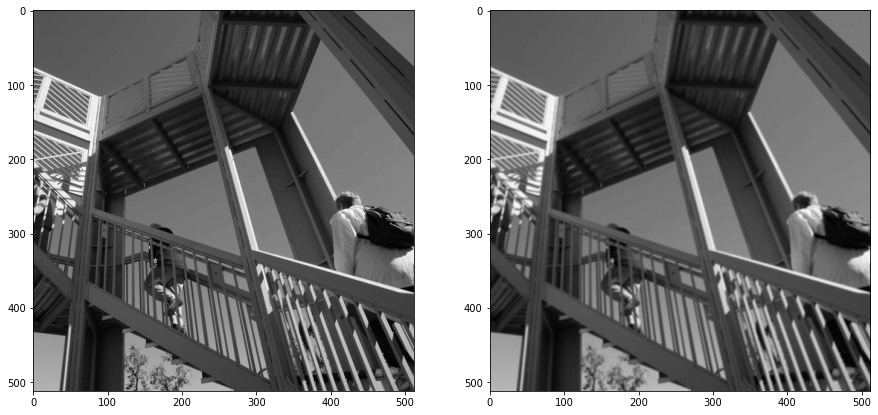

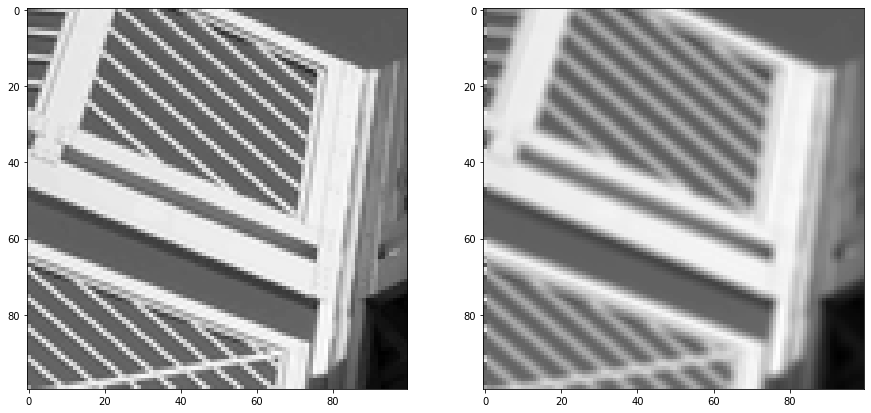

In [ ]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Фильтр улучшения чёткости**

In [ ]:
filter_ = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
print(filter_.shape)
filter_

(3, 3)


array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

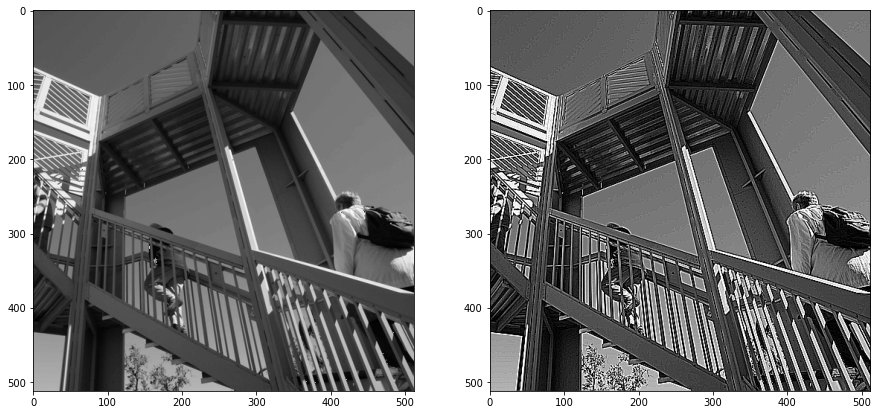

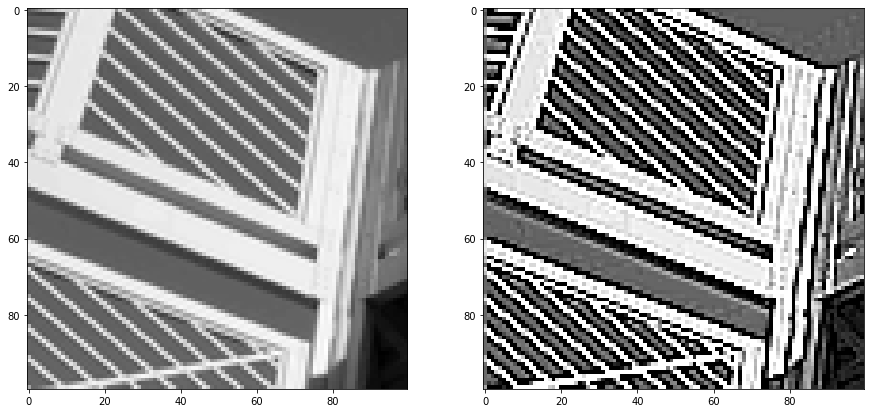

In [ ]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Фильтр Собеля**

Строка пикселей, которая выше текущего вычитается из строки, которая ниже. По сути, получаем производную в направлении по y, мы нашли все места, где идет переход от темного к светлому.

In [ ]:
filter_ = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
print(filter_.shape)
filter_

(3, 3)


array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

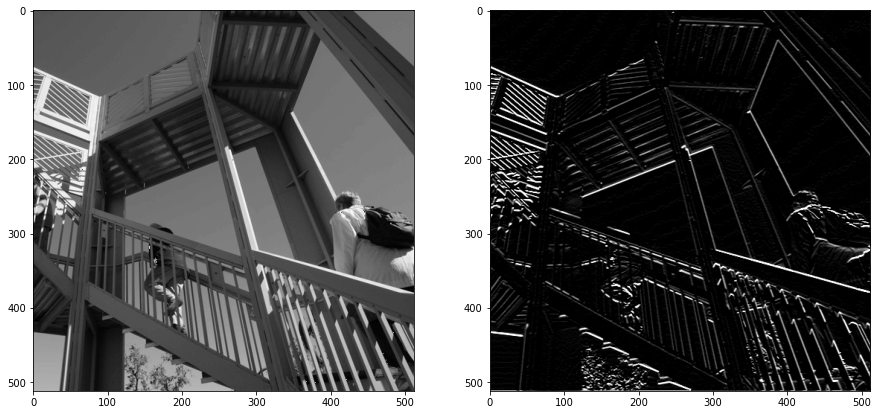

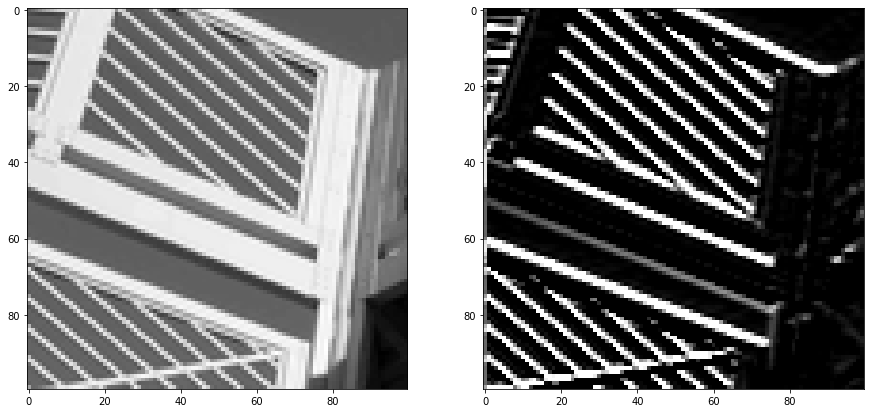

In [ ]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

Столбец пикселей, которая левее текущего вычитается из строки, которая правее. По сути, получаем производную в направлении по x, мы нашли все места, где идет переход от темного к светлому.

In [ ]:
filter_= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print(filter_.shape)
filter_

(3, 3)


array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

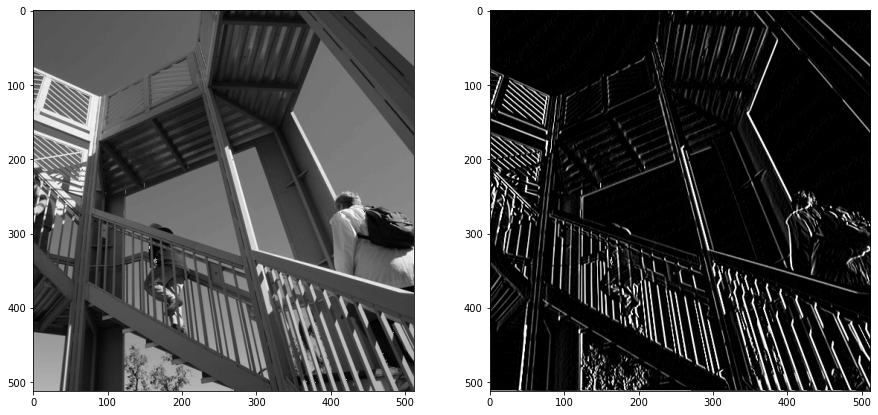

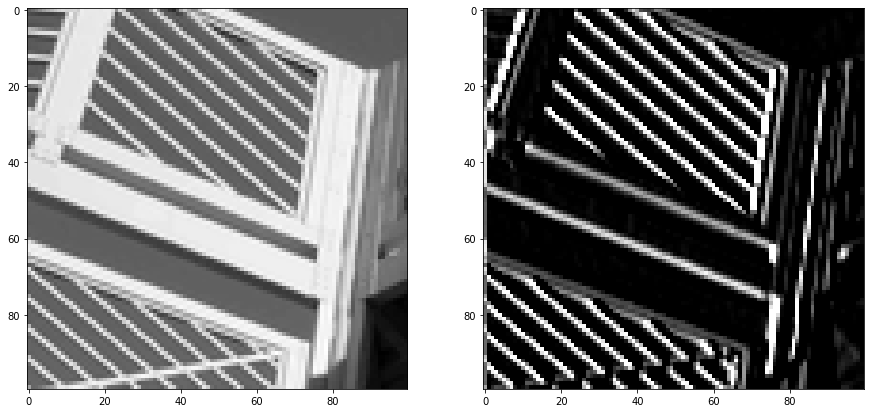

In [ ]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Фильтр Лапласа**

Выделяет те места, где было что-то яркое.

In [ ]:
filter_ = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
print(filter_.shape)
filter_

(3, 3)


array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

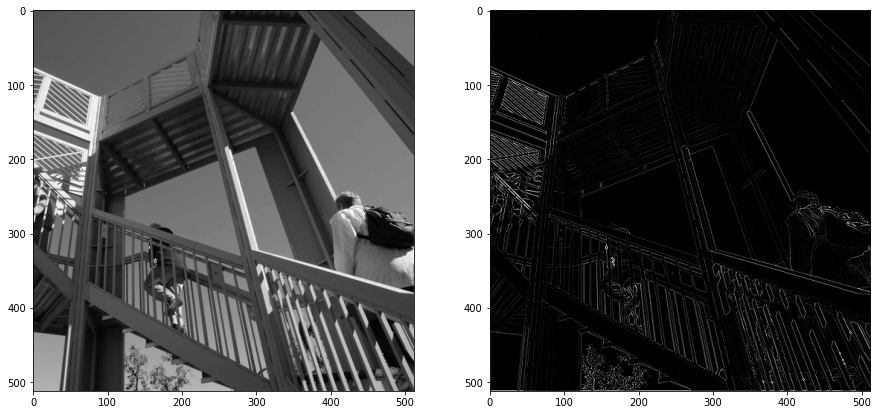

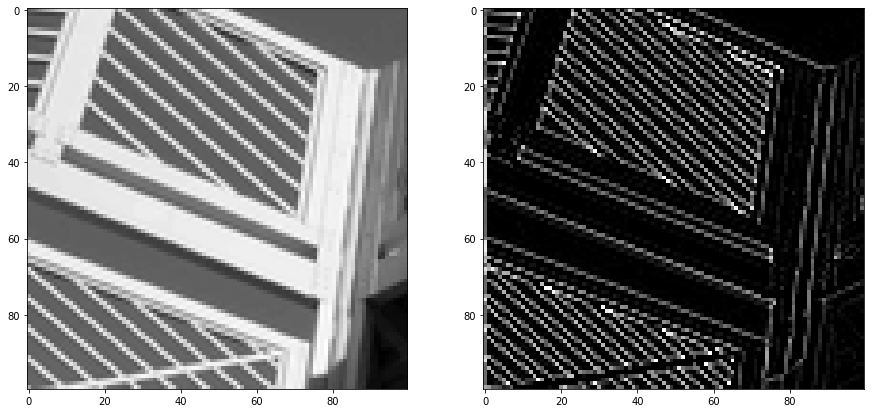

In [ ]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Обнаружение линий по горизонтали**

In [ ]:
filter_ = np.array([[-1, -1, -1], [2,  2,  2], [-1, -1, -1]])
print(filter_.shape)
filter_

(3, 3)


array([[-1, -1, -1],
       [ 2,  2,  2],
       [-1, -1, -1]])

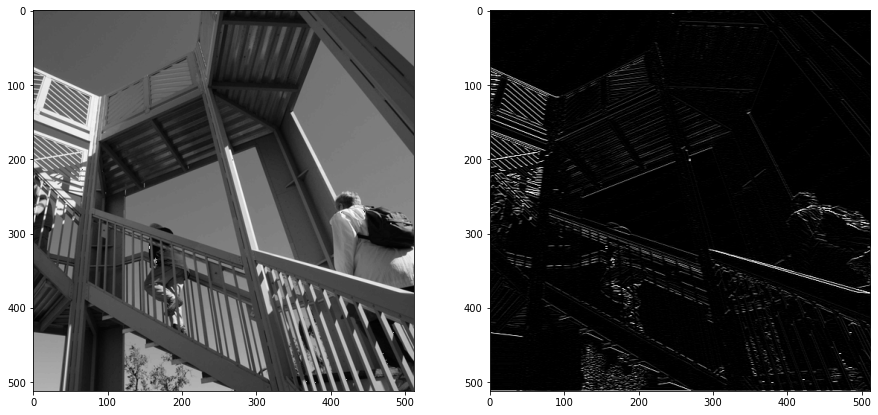

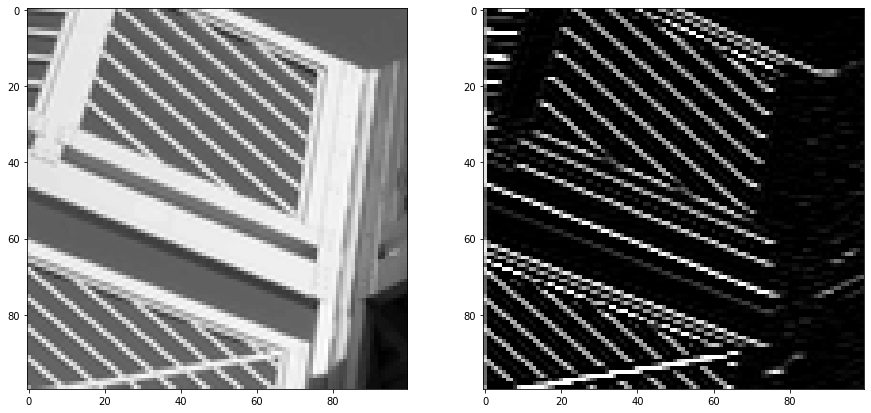

In [ ]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

Еще разные свертки можно посмотреть [здесь](https://desktop.arcgis.com/ru/arcmap/10.3/manage-data/raster-and-images/convolution-function.htm).

Смысл фильтров в том, чтобы выделить особенные места на изображении - признаки (карта признаков/feature map). К примеру, выше большей насыщенностью выделяются границы объектов, выделяются границы. Фильтры, которые смотрели до этого - придуманные.

А хотелось бы получать такие фильтры, которые достают признаки в зависимости от нашей задачи. И как раз сверточная нейронная сеть этим и занимается. Решается задача придумывания фильтра, подбора коэффициентов в нем.


В начальный момент в свертке случайные числа, но распространив её до выходов сети, далее выясняется, что не работает и с помощью метода обратного распространения ошибки идет исправления настраиваемых весов.


<img src='https://drive.google.com/uc?export=view&id=1fyvqBPZtdYRUi0uV6vo-z4eezhlGtq0G'>

Пример работы сверточного слоя представляет из себя карту признаков.

<img src='https://drive.google.com/uc?export=view&id=1VL7rH1leF1t-7bqDQUlBy412owdz4Usw' width=400px>

### Pooling

*Пуллинг* слои следуют за сверточными слоями и призваны очистить от лишней информации эти признаки и убрать у них локальную привязку. Сама операция пуллинга если говорить опять же упрощенно представляет из себя процесс отбрасывания менее значимых сигналов представленных в виде чисел.

Если всё время использовать только свертки, то в какой-то момент мы получим очень много признаков, но возможно столько признаков-то и не нужно. Имеет смысл сделать полученную информацию более общей. Poolling снижает размерность карты признаков, информация упрощается, с одной стороны хорошо - уменьшается размер данных, но с другой - мелкие детали теряются.


**MaxPooling**

<img src='https://drive.google.com/uc?export=view&id=1Ax5FjqHIlGQrnWPKW2Wm6mV-LT4qoF3X'>

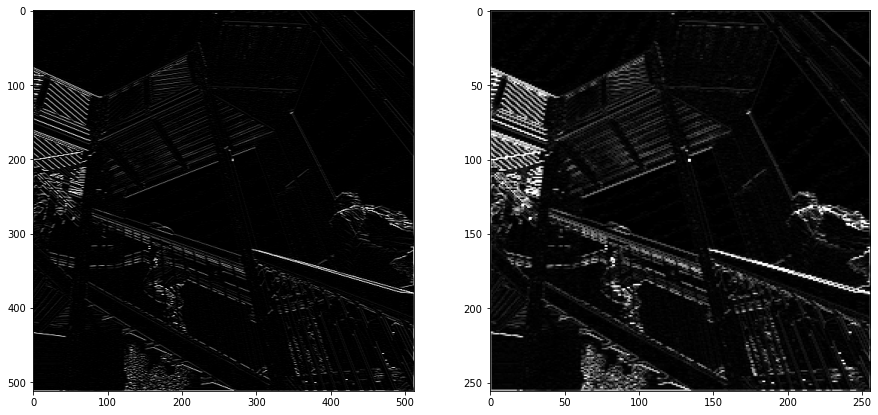

In [ ]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.max(pixels)


plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

Размер изображения уменьшился, но основная идея осталась, все пиксели с наибольшей интенсивностью сохранились.

**AveragePooling**

<img src='https://drive.google.com/uc?export=view&id=12Ok8f2fkXGomD4nIGfD6SbiT4ojCNsnZ'>

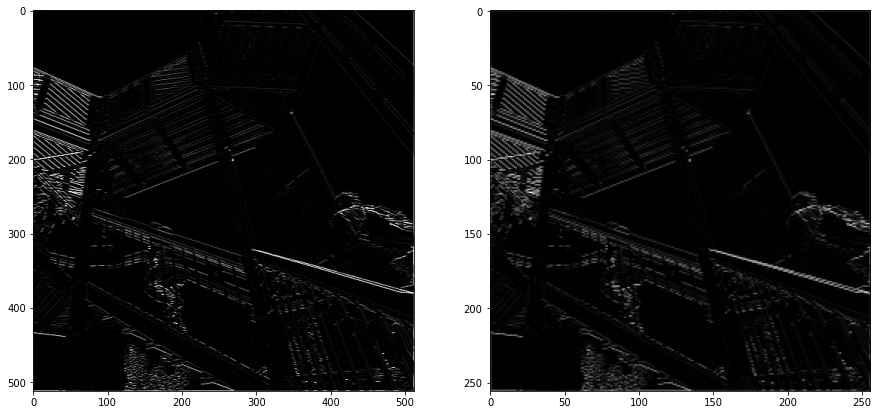

In [ ]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.mean(pixels)


plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

**SumPooling**

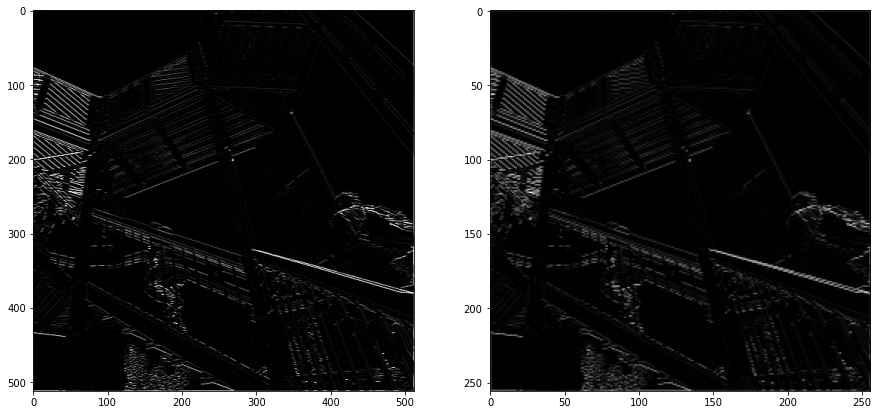

In [ ]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.sum(pixels)


plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

## Пример создания сверточных и пуллинг слоев на Keras

Все выше перечисленные слои имеют разные представления (Conv1D, Conv2D, Conv3D). Мы будем работать с Conv2D, что подразумевает наличие канала. Изображение, которое обрабатывается сверткой имеет размерность (width, height, channels).

Conv2D принимает на вход (bs, width, height, channels). Удобно для изображений<br>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

In [ ]:
# создание модели
x_input = Input(shape=(8, 8, 1))
x_conv = Conv2D(1, (3, 3), activation='relu', padding='same')(x_input)
x_pool = AveragePooling2D()(x_conv)

model = Model(x_input, x_pool)
model_conv = Model(x_input, x_conv)

# вывод описания созданной модели
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 8, 8, 1)]         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 1)           10        
_________________________________________________________________
average_pooling2d_8 (Average (None, 4, 4, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


**Padding**

<img src='https://drive.google.com/uc?export=view&id=10YL2TmF0Yp56nbnPrdbVSX7ft982JMR2'>

padding='valid'. Размерность new_x = x - kernel_size + 1<br>
padding='same'. Размерность new_x = x

**Stride**

<img src='https://drive.google.com/uc?export=view&id=1MXz5etAzJtzi7MudLQ-Unr0n3j0h5aso'>

In [ ]:
w_old = model.layers[-2].get_weights()
w_old

[array([[[[ 0.54498386]],
 
         [[ 0.32277572]],
 
         [[ 0.3819765 ]]],
 
 
        [[[ 0.23383081]],
 
         [[-0.09802887]],
 
         [[-0.3799628 ]]],
 
 
        [[[-0.5518935 ]],
 
         [[-0.01312792]],
 
         [[-0.4334777 ]]]], dtype=float32), array([0.], dtype=float32)]

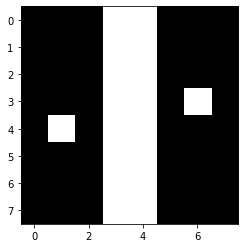

In [ ]:
# определение входных данных (8 массивов с 8 элементами)
data = [[0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 1, 0],
        [0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0]]

data = np.array(data)
plt.imshow(data)
data = data.reshape(1, 8, 8, 1)

In [ ]:
# определение детектора вертикальной линии
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.array(detector), np.array([0.0])]

# сохранение весов в модель
model.set_weights(weights)

# применение фильтра к входным данным
ypool = model.predict(data)

Входной тензор
[[[0 0 0 1 1 0 0 0]
  [0 0 0 1 1 0 0 0]
  [0 0 0 1 1 0 0 0]
  [0 0 0 1 1 0 1 0]
  [0 1 0 1 1 0 0 0]
  [0 0 0 1 1 0 0 0]
  [0 0 0 1 1 0 0 0]
  [0 0 0 1 1 0 0 0]]]
Результат свертки
[[[0. 0. 3. 3. 0. 0.]
  [0. 0. 3. 3. 0. 1.]
  [1. 0. 3. 3. 0. 1.]
  [1. 0. 3. 3. 0. 1.]
  [1. 0. 3. 3. 0. 0.]
  [0. 0. 3. 3. 0. 0.]]]


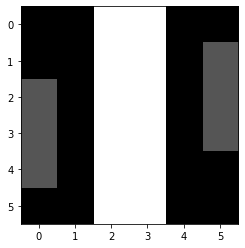

In [ ]:
y_conv = model_conv.predict(data)
print('Входной тензор')
print(data[..., 0])
print('Результат свертки')
print(y_conv[..., 0])
plt.imshow(y_conv[0][..., 0])

Результат пулинга
[[[0.   3.   0.25]
  [0.5  3.   0.5 ]
  [0.25 3.   0.  ]]]
размерность выхода пулинга (1, 3, 3, 1)


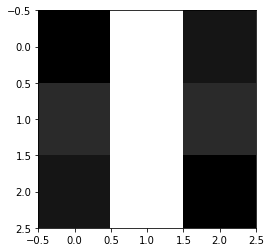

In [ ]:
plt.imshow(ypool[0][..., 0])
print('Результат пулинга')
print(ypool[..., 0])
print('размерность выхода пулинга', ypool.shape)

In [ ]:
# создание модели
x_input = Input(shape=(512, 512, 1))
x_conv = Conv2D(1, (3, 3), activation='relu', padding='same')(x_input)
x_pool = MaxPooling2D(pool_size=(2, 2))(x_conv)

model1 = Model(x_input, x_pool)
model_conv1 = Model(x_input, x_conv)



# определение дектора вертикальной линии
detector = [[[[-1]],[[2]],[[-1]]],
            [[[-1]],[[2]],[[-1]]],
            [[[-1]],[[2]],[[-1]]]]
weights = [np.array(detector), np.array([0.0])]

model1.set_weights(weights)

# вывод описания созданной модели
model1.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 512, 512, 1)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 512, 512, 1)       10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 1)       0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Входной тензор


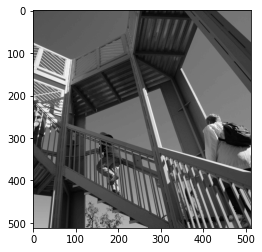

Результат свертки


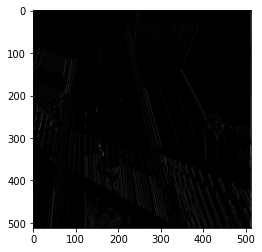

размерность входа (512, 512)
размерность выхода свертки (1, 512, 512, 1)
Результат пулинга


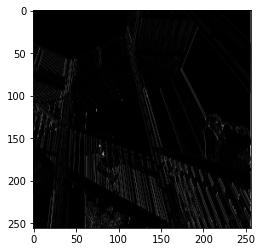

размерность выхода пулинга (1, 256, 256, 1)


In [ ]:
y_conv1 = model_conv1.predict(img.reshape((1,512,512,1)))
y_pool1 = model1.predict(img.reshape((1,512,512,1)))
print('Входной тензор')

plt.imshow(img)
plt.show()
print('Результат свертки')

plt.imshow(y_conv1[0, ..., 0])
plt.show()

print('размерность входа', img.shape)
print('размерность выхода свертки', y_conv1.shape)

print('Результат пулинга')

plt.imshow(y_pool1[0, ..., 0])
plt.show()
print('размерность выхода пулинга', y_pool1.shape)


<img src='https://drive.google.com/uc?export=view&id=1u2eCpOtYQgfEsnva-LTzf6Ue5NkGUhZS'>

In [ ]:
model = Sequential([
    Conv2D(1, (3, 3), padding='same', input_shape=(8, 8, 3)),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 8, 8, 1)           28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 1 канал - 4 + 4
# 2 канал - 4 + 4
# 3 канал - 4 + 4
#           1   1

# 1 канал - 4 + 4
# 2 канал - 4 + 4
#           1   1

# 1 канал - 9 + 9 + 9
# 2 канал - 9 + 9 + 9
#           1   1   1 

In [ ]:
model = Sequential([
    Conv2D(2, (2, 2), padding='same', input_shape=(8, 8, 3)),
    Conv2D(2, (2, 2), padding='same'),
    Conv2D(3, (3, 3), padding='same'),
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 8, 8, 2)           26        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 2)           18        
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 3)           57        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## Нейронная сеть Lenet5.

Lenet5 - это одна из первых сверточных нейронных сетей и она отражает характерные для сверточных нейронных сетей набор элементов - сверточные слои, пуллинг слои и полносвязные слои на конце нейронной сети. Данная архитектура послужила основой для многих современных архитектур сверточных нейронных сетей.

<img src='https://drive.google.com/uc?exoprt=view&id=1pPe1aBh7ySg89cxbWEZ07iabvvXABUxd'>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import tensorflow.keras as keras


# загрузка тренировочных и тестовых данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# нормализация данных [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# инициализация пустой модели
model = Sequential()
# первый сверточный слой
model.add(layers.Conv2D(6, (5, 5), strides=(1, 1),
                        activation='tanh',
                        input_shape=(28, 28, 1),
                        padding="valid"))
# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(1, 1),
                                  padding='same'))
# третий сверточный слой
model.add(layers.Conv2D(16, (5, 5), strides=(1, 1),
                        activation='tanh',
                        padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model.add(layers.Flatten())

# полносвязный слой
model.add(layers.Dense(120, activation='tanh'))
# полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_9 (Average (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 20, 20, 16)        2416      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               192120    
_________________________________________________________________
dense_15 (Dense)             (None, 84)               

Сверточные слои маленькие, у них не так много параметров, как у полносвязных слоев.

In [ ]:
# компиляция модели
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='SGD',
              metrics=["accuracy"])


hist = model.fit(X_train, y_train,
                 epochs=2,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/2
469/469 [==============================] - 5s 9ms/step - loss: 1.2775 - accuracy: 0.6719 - val_loss: 0.3991 - val_accuracy: 0.8953
Epoch 2/2
469/469 [==============================] - 4s 8ms/step - loss: 0.3870 - accuracy: 0.8957 - val_loss: 0.3002 - val_accuracy: 0.9173


In [ ]:
test_loss, test_metric = model.evaluate(X_test, y_test)
print(f"Test loss {test_loss:.4f}, accuracy {test_metric:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.2982 - accuracy: 0.9189
Test loss 0.2982, accuracy 0.92%


In [ ]:
y_pred = model.predict(X_test)

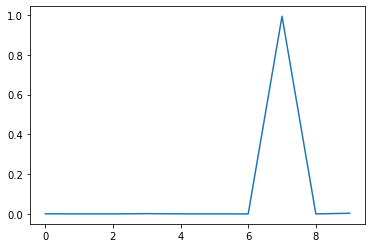

[5.5424485e-04 1.4122040e-04 1.8598212e-04 1.4164859e-03 3.2023346e-04
 3.1903578e-04 1.4358013e-05 9.9366754e-01 1.4084099e-04 3.2401427e-03]


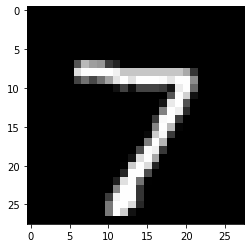

In [ ]:
plt.plot(y_pred[0][:])
plt.show()
print(y_pred[0][:])
plt.imshow(X_test[0][:,:,0])
plt.show()

Построим примерно такую же сеть через функциональное описание

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# загрузка тренировочных и тестовых данных
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# нормализация данных [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Model 
# инициализация  модели
input1= layers.Input(shape=(28, 28, 1))
# первый сверточный слой
x1 = layers.Conv2D(6, (5, 5), strides=(1, 1),
                   activation='tanh',
                   padding="valid")(input1)

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2),
                             strides=(1, 1),
                             padding='same')(x1)

# третий сверточный слой
x3 = layers.Conv2D(16, (5, 5), strides=(1, 1),
                   activation='tanh',
                   padding='valid')(x2)

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2),
                             strides=(2, 2),
                             padding='same')(x3)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x5 = layers.Flatten()(x4)

# полносвязный слой
x6 = layers.Dense(120, activation='tanh')(x5)
# полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model = Model(inputs=input1, outputs=out_x)

# сделаем несколько промежуточных выходов (через них посмотрим, что происходит в сети) 
model1 = Model(inputs=input1, outputs=x1)
model3 = Model(inputs=input1, outputs=x3)

model.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 20, 20, 16)        2416      
_________________________________________________________________
average_pooling2d_14 (Averag (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 120)               192

In [ ]:
# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='SGD',
              metrics=["accuracy"])

# Обучаем модель
hist = model.fit(X_train, y_train,
                 epochs=2,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 verbose=1)

test_loss, test_metric = model.evaluate(X_test, y_test)
print(f"Test loss {test_loss:.4f}, accuracy {test_metric:.2f}%")

Epoch 1/2
469/469 [==============================] - 5s 9ms/step - loss: 1.4010 - accuracy: 0.5491 - val_loss: 0.7013 - val_accuracy: 0.7394
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.6065 - accuracy: 0.7706
Test loss 0.6065, accuracy 0.77%


Сделаем предикт для примеров тестов

In [ ]:
y_pred = model.predict(X_test)

Подглядываем в первый сверточный слой

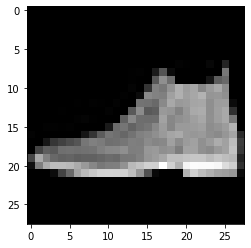

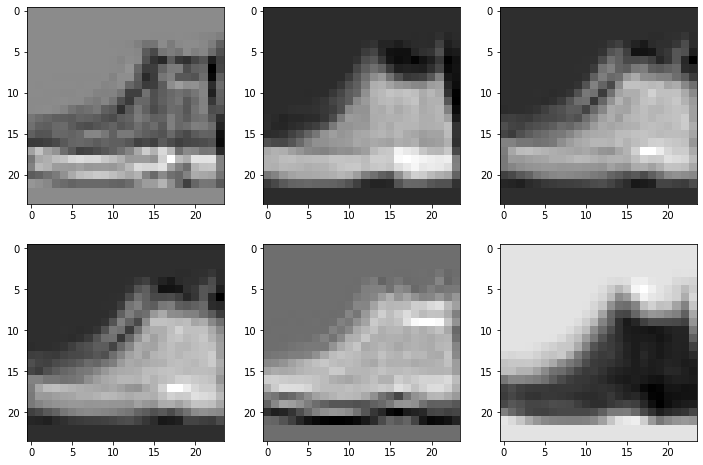

In [ ]:
b = model1.predict(X_test)

n = 0
plt.imshow(X_test[n, ..., 0])
plt.show()

plt.figure(figsize=(12, 8))
for i in range(2):
    for j in range(3):
        plt.subplot(2,3,i*3+j+1)
        plt.imshow(b[n][:,:,i*2+j])
plt.show()

Подглядываем в третий сверточный слой

In [ ]:
b3 = model3.predict(X_test[:10])
b3.shape

(10, 20, 20, 16)

Содержание внутреннего слоя 

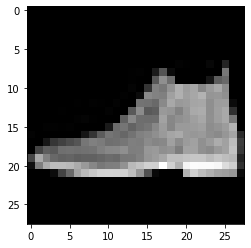

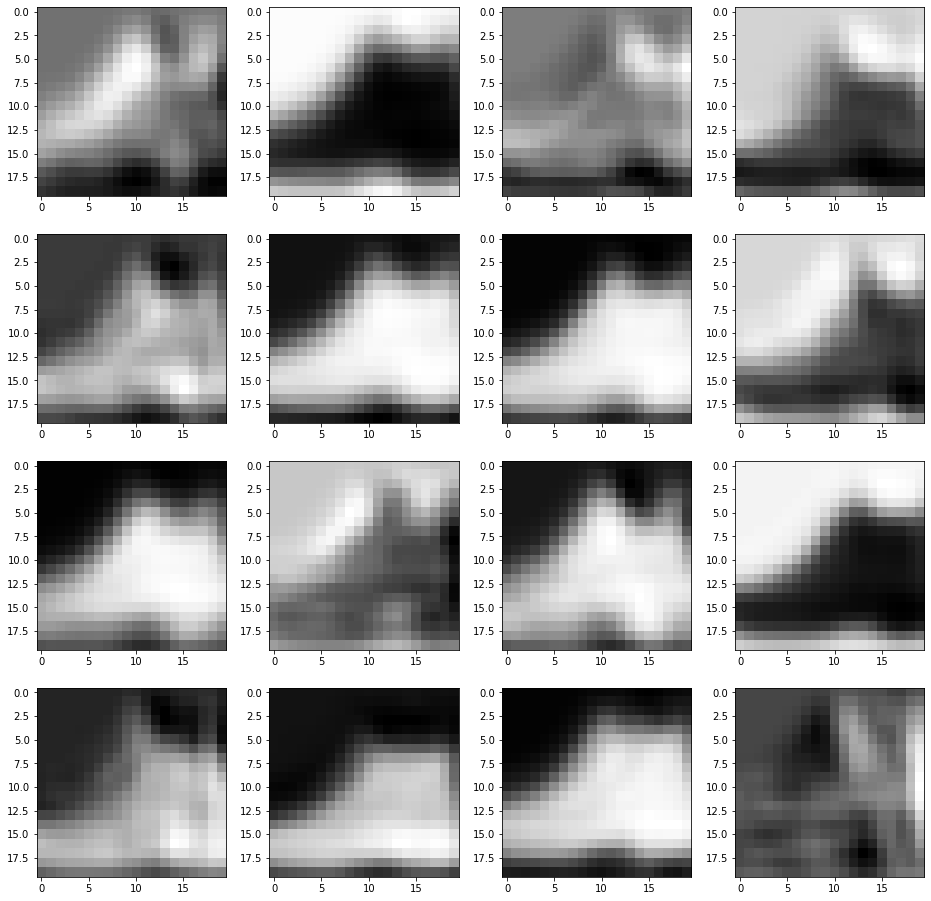

In [ ]:
n = 0
plt.imshow(X_test[n,:,:,0])
plt.show()

plt.figure(figsize=(16,16))
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(b3[n][:,:,i*4+j])
plt.show()

Сделаем ссылку для обращения к слою

In [ ]:
model3_layer = model3.get_layer(index=-1)
model3.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 20, 20, 16)        2416      
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


Получим веса слоя

In [ ]:
w_ = model3_layer.get_weights()

Размер ядер слоя

In [ ]:
w_[0].shape

(5, 5, 6, 16)

Сами ядра

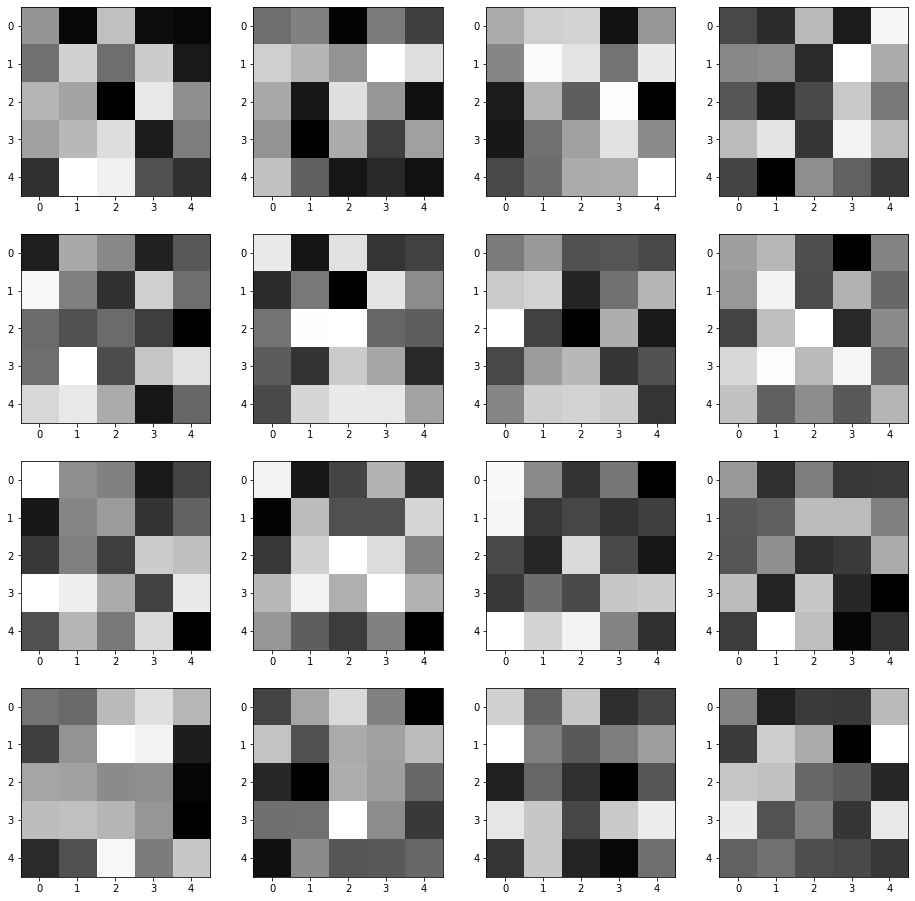

In [ ]:
plt.figure(figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        plt.imshow(w_[0][..., 0, i*4+j])
plt.show()

In [ ]:
w_[0][..., 0, 15]

array([[-0.00110232, -0.08695631, -0.06431359, -0.06573231,  0.04481719],
       [-0.06438243,  0.06164189,  0.03190869, -0.11439461,  0.10373461],
       [ 0.05484609,  0.05048121, -0.02608771, -0.03647678, -0.0816471 ],
       [ 0.08556836, -0.04310973, -0.00509261, -0.06787733,  0.08457097],
       [-0.03129352, -0.01847723, -0.04738497, -0.05127103, -0.06750884]],
      dtype=float32)

## Сложные конструкции из простых слоев

Слой для объединения - Concatenate, слеивание по осям (можно вдоль x, y, количеству каналов). 

https://keras.io/api/layers/merging_layers/concatenate/

In [ ]:
from tensorflow.keras.layers import (Dense, Flatten, Concatenate, Average, 
                                     Maximum, Add, Subtract, Multiply)
from tensorflow.keras.utils import plot_model 

Строим сеть из трех нитей

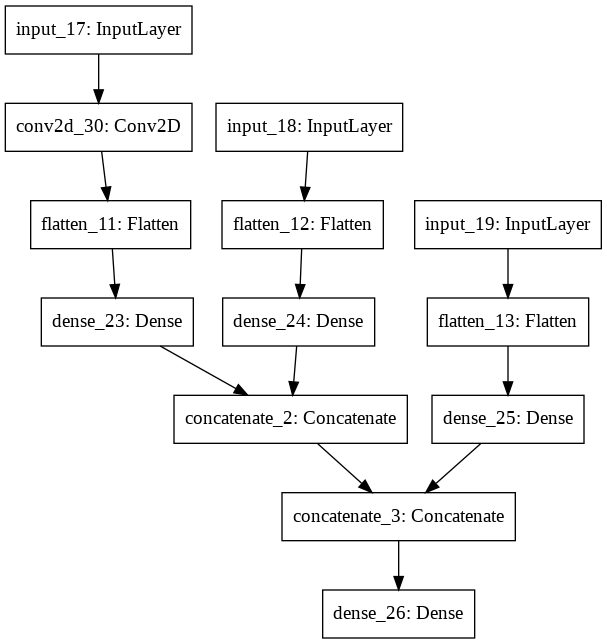

In [ ]:
first_input = Input(shape=(28, 28, 1))
x11 = Conv2D(10, 3, activation='relu')(first_input)
x11 = Flatten()(x11)
first_dense = Dense(1,)(x11)

second_input = Input(shape=(28, 28, 1))
x22 = Flatten()(second_input)
second_dense = Dense(1,)(x22)

merge_one = Concatenate()([first_dense, second_dense])

third_input = Input(shape=(28, 28, 1))
x33 = Flatten()(third_input)
x33 = Dense(1,)(x33)
merge_two = Concatenate()([merge_one, x33])
merge_two = Dense(10, activation='softmax')(merge_two)


model_stack = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1)
model_stack.compile(optimizer=ada_grad,
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])


plot_model(model_stack, 'model_stack.png')

In [ ]:
model_stack.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 26, 26, 10)   100         input_4[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 6760)         0           conv2d_10[0][0]                  
____________________________________________________________________________________________

In [ ]:
hist = model_stack.fit([X_train, X_train, X_train], y_train,
                       epochs=5,
                       validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8608 - accuracy: 0.6945 - val_loss: 0.5768 - val_accuracy: 0.7802
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5212 - accuracy: 0.8038 - val_loss: 0.5272 - val_accuracy: 0.8089
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4978 - accuracy: 0.8156 - val_loss: 0.4971 - val_accuracy: 0.8189
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4730 - accuracy: 0.8280 - val_loss: 0.4887 - val_accuracy: 0.8243
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4487 - accuracy: 0.8384 - val_loss: 0.4804 - val_accuracy: 0.8296


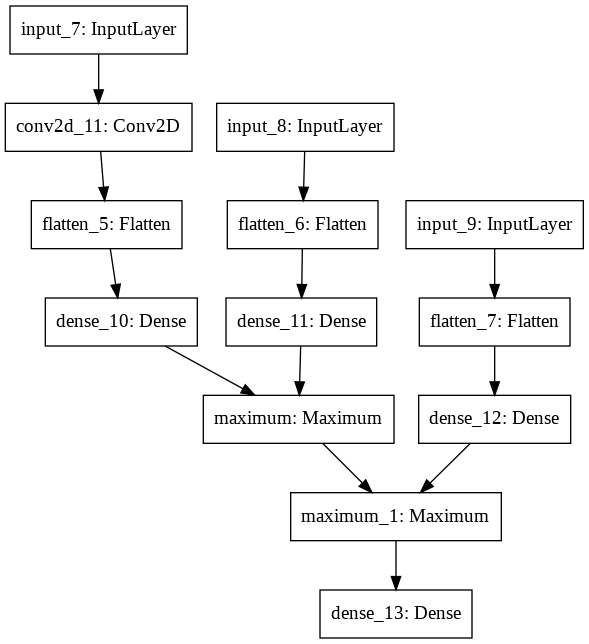

In [ ]:
first_input = Input(shape=(28, 28, 1))
x11 = Conv2D(10, 3, activation='relu')(first_input)
x11 = Flatten()(x11)
first_dense = Dense(1,)(x11)

second_input = Input(shape=(28, 28, 1))
x22 = Flatten()(second_input)
second_dense = Dense(1,)(x22)

merge_one = Maximum()([first_dense, second_dense])

third_input = Input(shape=(28, 28, 1))
x33 = Flatten()(third_input)
x33 = Dense(1,)(x33)
merge_two = Maximum()([merge_one, x33])
merge_two = Dense(10, activation='softmax')(merge_two)


model_stack = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1)
model_stack.compile(optimizer=ada_grad,
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])


plot_model(model_stack, 'model_stack.png')

In [ ]:
model_stack.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 26, 26, 10)   100         input_7[0][0]                    
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 6760)         0           conv2d_11[0][0]                  
____________________________________________________________________________________________

In [ ]:
hist = model_stack.fit([X_train, X_train, X_train],
                       y_train,
                       epochs=5,
                       validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 1.4758 - accuracy: 0.3787 - val_loss: 1.0770 - val_accuracy: 0.5965
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0443 - accuracy: 0.5898 - val_loss: 0.9812 - val_accuracy: 0.6416
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.9618 - accuracy: 0.6315 - val_loss: 0.9340 - val_accuracy: 0.6377
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.9231 - accuracy: 0.6554 - val_loss: 0.9128 - val_accuracy: 0.6366
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8912 - accuracy: 0.6681 - val_loss: 0.8903 - val_accuracy: 0.6623


## Пример на Keras более сложной сверточной нейронной сети

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

### Dropout

Метод регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети за счет предотвращения сложных адаптаций отдельных нейронов на тренировочных данных во время обучения.

Характеризует исключение определённого процента (например 50%) случайных нейронов на разных итерациях во время обучения нейронной сети. В результате  обучение происходит более общее, нет надежды на определенные нейроны. Такой приём значительно увеличивает скорость обучения, качество обучения на тренировочных данных, а также повышает качество предсказаний модели на новых тестовых данных.

На моменте предсказания все нейроны включаются обратно, dropout не используется.

<img src='https://drive.google.com/uc?export=view&id=1KQrdTDanDkLhf8Kn8c5ryjqN2acwYWII'>

In [ ]:
from keras.layers import Dropout
Dropout(rate=0.5)

### Batch Normalization

Batch Normalization (Пакетная нормализация) — метод, который позволяет повысить производительность и стабилизировать работу искусственных нейронных сетей. Суть данного метода заключается в том, что некоторым слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое мат. ожидание и единичную дисперсию.

Batch norm дает следующие эффекты:

- ускорение сходимости модели;
- бОльшая независимость обучения каждого слоя нейронов;
- в некоторой степени предотвращает эффект переобучения;
- меньшая чувствительность к начальной инициализации весовых коэффициентов.


<img src='https://drive.google.com/uc?export=view&id=1y0ye2bQTB2cwgP4cgxVQ50Fhi8FvIZeH'>

Получается, что нейронам в одной сети приходится адаптироваться к разным картинкам на разных итерациях, потому что разные статистические показатели распределений приходят на вход, из-за чего снижается скорость сходимости, чтобы это было легче для сети, можно выполнять нормализацию батча.

Получается, что нужно нормировать статистические показатели. 

<img src='https://drive.google.com/uc?export=view&id=11YY3T8a31W583tJHxz-Sq7Q7A3Z02a47'>


<h2>$z^i_k = \frac{v^i_k + m_v}{\sqrt{ \sigma^2_v+ \epsilon}}$</h2><br>
$y_i^k = \gamma z_i^k + \beta$, где $\gamma$ и $\beta$ - это настраиваемые параметры, которые нужны для дополнительного масштабирования и смещения.






In [ ]:
from keras.layers import BatchNormalization

Sequential([
    BatchNormalization(input_shape=(8, 8, 2))
]).summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 8, 8, 2)           8         
Total params: 8
Trainable params: 4
Non-trainable params: 4
_________________________________________________________________


Давайте теперь попробуем сделать несколько усложненный вариант нейронной сети разобранной ранее. В ней будет на несколько слоев больше и в ней будет использоваться data augumentation, процедура позволяющая за счет искажений изображений увеличить количество тренировочных данных, а как мы знаем чем больше тренировочных данных тем лучше будет работать нейросеть. Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

In [ ]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
# установка параметров нейросети
batch_size = 512
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


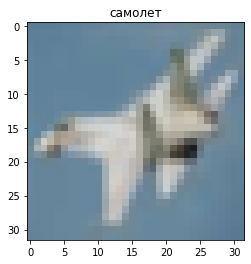

In [ ]:
N = 10

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [ ]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 64)      

### Аугментация

Под аугментацией данных понимается увеличение выборки данных для обучения через модификацию существующих данных. Учитывая ресурсы на разметку изображений, для задачи распознавания объектов аугментация может быть крайне полезна.

Функции аугментаций делятся на следующие типы:
- операции с цветом (подкрутить цветовые каналы, увеличение контраста или яркости)
- геометрические операции (повернуть изображение, отразить изображение и т.п.)

<img src='https://drive.google.com/uc?export=view&id=1dd1v71lJFuheC7lod1afAKT_zDwuHCmN'>

In [ ]:
data_augmentation = True

In [ ]:
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=10, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0.2, 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    train_gen = datagen.flow(X_train, 
                             y_train,
                             batch_size=batch_size)

    # запуск data augmentation через fit_generator
    model.fit_generator(train_gen,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        workers=4)

Использование data augmentation


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
98/98 [==============================] - 47s 452ms/step - loss: 2.3072 - accuracy: 0.1043 - val_loss: 2.2977 - val_accuracy: 0.1377
Epoch 2/5
98/98 [==============================] - 47s 449ms/step - loss: 2.2979 - accuracy: 0.1144 - val_loss: 2.2907 - val_accuracy: 0.1461
Epoch 3/5
98/98 [==============================] - 46s 451ms/step - loss: 2.2893 - accuracy: 0.1353 - val_loss: 2.2737 - val_accuracy: 0.1794
Epoch 4/5
98/98 [==============================] - 46s 452ms/step - loss: 2.2657 - accuracy: 0.1544 - val_loss: 2.2180 - val_accuracy: 0.2230
Epoch 5/5
98/98 [==============================] - 46s 450ms/step - loss: 2.2012 - accuracy: 0.1864 - val_loss: 2.1040 - val_accuracy: 0.2496


In [ ]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print(f'сохранить обученную модель как {model_path}')

# проверка работы обученной модели
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5
313/313 [==============================] - 2s 5ms/step - loss: 2.1040 - accuracy: 0.2496
Test loss: 2.104025363922119
Test accuracy: 0.24959999322891235


Что вернет ImageDataGenerator

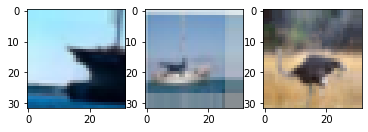

In [ ]:
for batch in train_gen:
    imgs = batch[0]
    labels = batch[1]
    plt.subplot(131)
    plt.imshow(imgs[0])
    plt.subplot(132)
    plt.imshow(imgs[1])
    plt.subplot(133)
    plt.imshow(imgs[2])

    plt.show()
    break

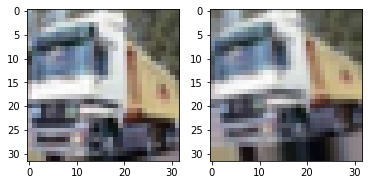

In [ ]:
N = 1

for img, y in datagen.flow(X_train[N:N+1],
                           y_train[N:N+1],
                           batch_size=1):
    plt.subplot(1,2,1)
    plt.imshow(X_train[N])
    plt.subplot(1,2,2)
    plt.imshow(img[0])

    plt.show()
    break

(3, 32, 32, 3) (3, 10)


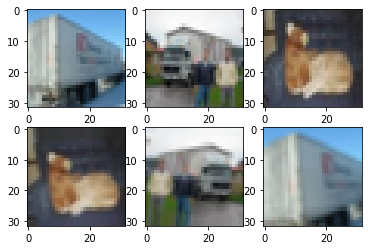

In [ ]:
N = 15

for img, y in datagen.flow(X_train[N:N+3],
                           y_train[N:N+3],
                           batch_size=3):
    print(img.shape, y.shape)
    fig, ax = plt.subplots(2, 3)
    ax[0][0].imshow(X_train[N])
    ax[0][1].imshow(X_train[N+1])
    ax[0][2].imshow(X_train[N+2])
    
    ax[1][0].imshow(img[0])
    ax[1][1].imshow(img[1])
    ax[1][2].imshow(img[2])

    plt.show()
    break

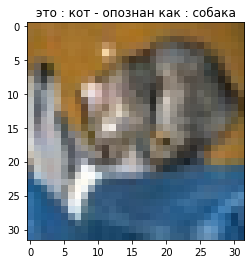

In [ ]:
N = 3
y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

https://www.kaggle.com/julichitai/gb-asl-classification

## Домашнее задание

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10
2. оценить рост точности при увеличении ширины сети (больше фильтров)
3. оценить рост точности при увеличении глубины сети (больше слоев)
4. *сравнить с точностью полносвязной сети для этой выборки



## Набор данных для курсового проекта

https://www.notion.so/21f239a4d05e4cbf84a71c869668ecd3

## Дополнительные материалы


1. https://keras.io/layers/convolutional/
2. https://keras.io/layers/pooling/
3. https://keras.io/preprocessing/image/
4. [Архитектуры нейросетей](https://habr.com/ru/company/nix/blog/430524/)
5. [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)
6. [AlexNet](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)
7. [VGG](https://arxiv.org/abs/1409.1556)
8. [GoogLeNet](https://arxiv.org/abs/1409.4842)
9. [ResNet](https://arxiv.org/abs/1512.03385)
10. [Batch Normalization (батч-нормализация) что это такое?](https://proproprogs.ru/neural_network/batch-normalization-batch-normalizaciya-chto-eto-takoe)



## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко Сергей Игоревич, Кадурин А. А. - Глубокое обучение. Погружение в мир нейронных сетей  2018</li>
    <li>Francois Chollet - Deep Learning with Python 2018</li>
    <li>Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton - ImageNet Classification with Deep Convolutional Neural Networks</li>
    <li>Karen Simonyan, Andrew Zisserman - Very Deep Convolutional Networks for Large-Scale Image Recognition</li>
    <li>Википедия</li>    
</ol>

## Определения

**Глубокие нейронные сети** — это сети, с более чем одним внутренним слоем.

**Глубокое обучение** — это обучение глубоких нейронных сетей.

**Свёрточная нейронная сеть (convolutional neural network, CNN)** — специальная архитектура искусственных нейронных сетей, предложенная Яном Лекуном в 1988 году и нацеленная на эффективное распознавание образов.

**Слой пулинга** необходим для уменьшения размера свернутого элемента в пространстве. Это помогает уменьшить вычислительную мощность, необходимую для обработки данных, за счет уменьшения размерности. Кроме того, это важно и для извлечения доминирующих признаков.

**Dropout** — метод регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети за счет предотвращения сложных адаптаций отдельных нейронов на тренировочных данных во время обучения.

**Batch Normalization (Пакетная нормализация)** — метод, который позволяет повысить производительность и стабилизировать работу искусственных нейронных сетей. Суть данного метода заключается в том, что некоторым слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое мат. ожидание и единичную дисперсию.